In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import pymeshlab as pml
import time

### Calibration

In [3]:
CHESSBOARD_CORNER_NUM_X = 8
CHESSBOARD_CORNER_NUM_Y = 6

In [ ]:
# Initialize both webcams
cap1 = cv2.VideoCapture(0)  # Default webcam
cap2 = cv2.VideoCapture(1)  # Second webcam

# Check if cameras opened successfully
if not cap1.isOpened() or not cap2.isOpened():
    print("Error: Could not open one or both cameras")
    exit()

index = 1
while True:
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()

    if ret1 and ret2:
        cv2.imshow('Left Camera', frame1)
        cv2.imshow('Right Camera', frame2)

        # Save the images when 's' is pressed
        key = cv2.waitKey(1)
        if key & 0xFF == ord('s'):
            cv2.imwrite(f'calibration/left/{index}.jpg', frame1)
            cv2.imwrite(f'calibration/right/{index}.jpg', frame2)
            print(f"Saved image pair {index}")
            index += 1
        # Break on 'q' key press
        if key & 0xFF == ord('q'):
            break
    else:
        print("Failed to capture image pair")

# Release the cameras
cap1.release()
cap2.release()
cv2.destroyAllWindows()

Error: Could not open one or both cameras
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
Failed to capture image pair
F

KeyboardInterrupt: 

: 

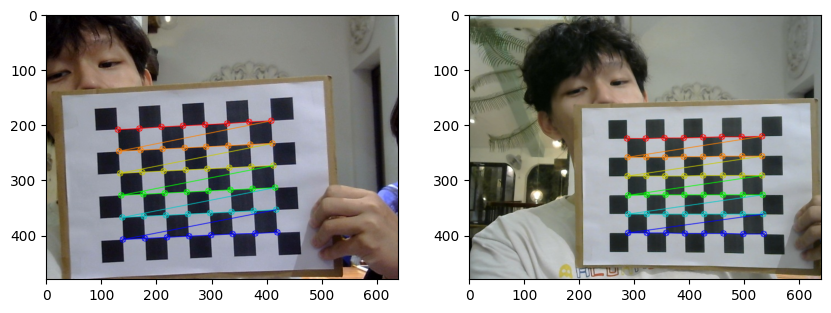

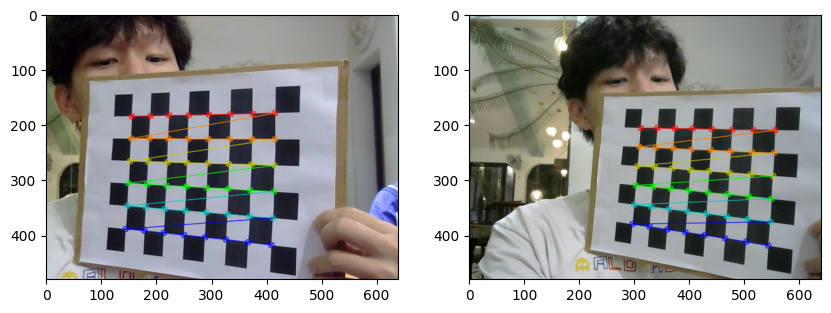

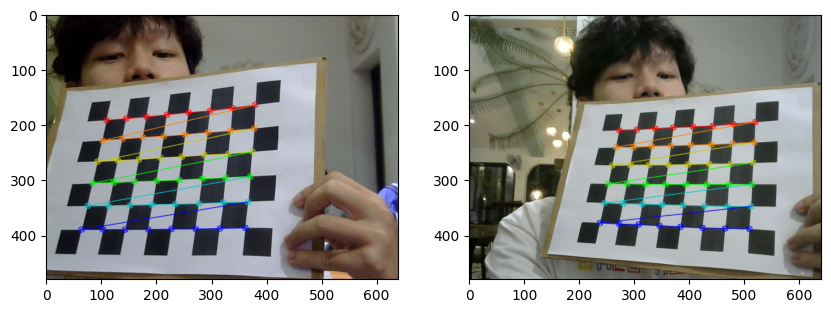

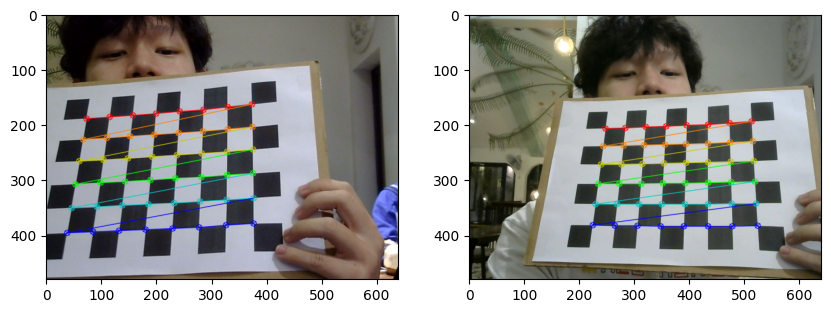

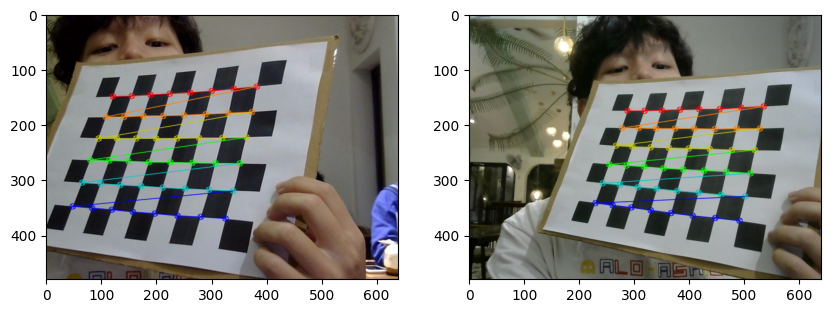

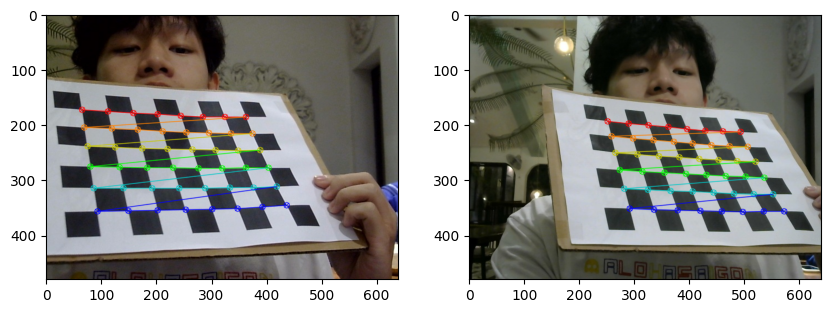

In [4]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
objp = np.zeros((CHESSBOARD_CORNER_NUM_X*CHESSBOARD_CORNER_NUM_Y,3), np.float32)
objp[:,:2] = np.mgrid[0:CHESSBOARD_CORNER_NUM_X*40:40,0:CHESSBOARD_CORNER_NUM_Y*40:40].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpointsL = [] # 2d points in image plane.
imgpointsR = [] # 2d points in image plane.

imagesLeft = glob.glob('./calibration/left/*.jpg')
imagesRight = glob.glob('./calibration/right/*.jpg')

for imgLeft, imgRight in zip(imagesLeft, imagesRight):
    imgL = cv2.imread(imgLeft)
    imgR = cv2.imread(imgRight)
    grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
    grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    retL, cornersL = cv2.findChessboardCorners(grayL, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), None)
    retR, cornersR = cv2.findChessboardCorners(grayR, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), None)
    # If found, add object points, image points (after refining them)
    if retL and retR == True:
        objpoints.append(objp)

        cornersL = cv2.cornerSubPix(grayL,cornersL, (11,11), (-1,-1), criteria)
        imgpointsL.append(cornersL)
        cornersR = cv2.cornerSubPix(grayR,cornersR, (11,11), (-1,-1), criteria)
        imgpointsR.append(cornersR)

        # Draw and display the corners
        cv2.drawChessboardCorners(imgL, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), cornersL, retL)
        cv2.drawChessboardCorners(imgR, (CHESSBOARD_CORNER_NUM_X,CHESSBOARD_CORNER_NUM_Y), cornersR, retR)
        plt.figure(figsize=(10,10))
        plt.subplot(1,2,1)
        plt.imshow(imgL[:,:,::-1])
        plt.subplot(1,2,2)
        plt.imshow(imgR[:,:,::-1])

In [5]:
retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpoints, imgpointsL, grayL.shape[::-1], None, None)
print(f"Left camera\nMatrix: \n{mtxL}\nDistortion coefficients : \n{distL}")
heightL, widthL, channelsL = imgL.shape
newCameraMatrixL, roiL = cv2.getOptimalNewCameraMatrix(mtxL, distL, (widthL, heightL), 1, (widthL, heightL))
print()

retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpoints, imgpointsR, grayR.shape[::-1], None, None)
print(f"Right camera\nMatrix is \n{mtxR}\nDistortion coefficients : \n{distR}")
heightR, widthR, channelsR = imgR.shape
newCameraMatrixR, roiR = cv2.getOptimalNewCameraMatrix(mtxR, distR, (widthR, heightR), 1, (widthR, heightR))

Left camera
Matrix: 
[[1.01323516e+03 0.00000000e+00 2.94355741e+02]
 [0.00000000e+00 1.04595919e+03 1.01775569e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients : 
[[ 0.24771248 -0.87015953 -0.07123968 -0.01028125  3.15876995]]

Right camera
Matrix is 
[[876.81929887   0.         295.1403875 ]
 [  0.         896.05429159 128.0266442 ]
 [  0.           0.           1.        ]]
Distortion coefficients : 
[[-3.62445945e-02  6.28735993e-01 -4.36433813e-02  3.91363125e-04
  -1.39320257e+00]]


In [6]:
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC
criteria_stereo = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.001)
retStereo, newCameraMatrixL, distL, newCameraMatrixR, distR, R, T, essentialMatrix, fundamentalMatrix = cv2.stereoCalibrate(objpoints, imgpointsL, imgpointsR, newCameraMatrixL, distL, newCameraMatrixR, distR, grayL.shape[::-1], criteria_stereo, flags)

In [7]:
rectifyScale = 1
rectL, rectR, projMatrixL, projMatrixR, Q, roiL, roiR = cv2.stereoRectify(
    newCameraMatrixL, distL, newCameraMatrixR, distR, grayL.shape[::-1], R, T, rectifyScale, (0, 0))

stereoMapL = cv2.initUndistortRectifyMap(newCameraMatrixL, distL, rectL, projMatrixL, grayL.shape[::-1], cv2.CV_16SC2)
stereoMapR = cv2.initUndistortRectifyMap(newCameraMatrixR, distR, rectR, projMatrixR, grayR.shape[::-1], cv2.CV_16SC2)

In [8]:
cv_file = cv2.FileStorage('stereoMap.xml', cv2.FILE_STORAGE_WRITE)
cv_file.write("stereoMapL_x", stereoMapL[0])
cv_file.write("stereoMapL_y", stereoMapL[1])
cv_file.write("stereoMapR_x", stereoMapR[0])
cv_file.write("stereoMapR_y", stereoMapR[1])
cv_file.release()

### Depth Map

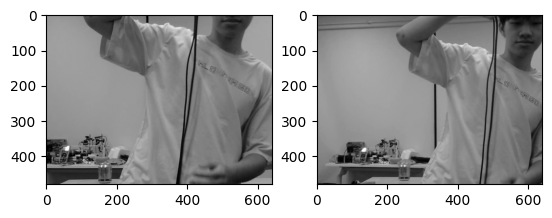

In [9]:
imgL = cv2.imread('frames/left/frame_left.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('frames/right/frame_right.jpg', cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(imgL, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imgR, cmap='gray')

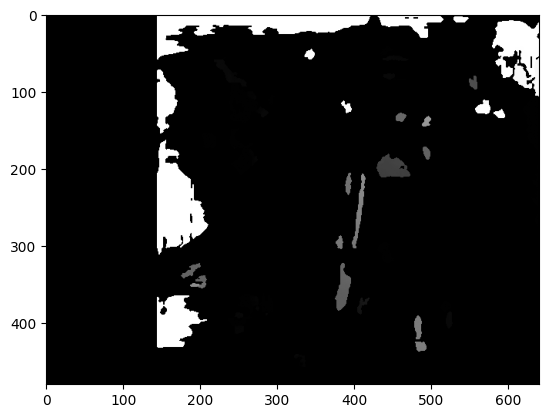

In [10]:
NUM_DISPARITIES = 9
BLOCK_SIZE = 15
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=16*NUM_DISPARITIES,
    blockSize=BLOCK_SIZE,
    P1=8 * 3 * BLOCK_SIZE ** 2,
    P2=32 * 3 * BLOCK_SIZE ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32
)
disparity = stereo.compute(imgL,imgR)
cv2.imwrite('depth.png',disparity)
plt.imshow(disparity, cmap='gray')

In [ ]:
with open("camera_params.json", 'r') as f:
    params = json.load(f)

color_intrinsics = params["color_intrinsics"]
fx_color = color_intrinsics["fx"]
fy_color = color_intrinsics["fy"]
ppx_color = color_intrinsics["ppx"]
ppy_color = color_intrinsics["ppy"]

depth_intrinsics = params["depth_intrinsics"]
fx_depth = depth_intrinsics["fx"]
fy_depth = depth_intrinsics["fy"]
ppx_depth = depth_intrinsics["ppx"]
ppy_depth = depth_intrinsics["ppy"]

R = np.array(params["extrinsics"]["rotation"]).reshape(3, 3)
t = np.array(params["extrinsics"]["translation"]).reshape(3, 1)

In [ ]:
depth_scale = 1000.0
color_img = cv2.imread('frames/left/1.png')
color_img_rgb = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
depth_img = cv2.imread("depth.png", cv2.IMREAD_UNCHANGED)
depth = depth_img.astype(np.float32) / depth_scale

h, w = depth.shape
x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
X_depth = (x_coords - ppx_depth) * depth / fx_depth
Y_depth = (y_coords - ppy_depth) * depth / fy_depth
Z_depth = depth

In [ ]:
points_depth = np.stack((X_depth, Y_depth, Z_depth), axis=-1)
points_depth_flat = points_depth.reshape(-1, 3).T
points_color_flat = (R @ points_depth_flat) + t
points_color = points_color_flat.T.reshape(h, w, 3)

points_color_flat = points_color.reshape(-1, 3)
valid_mask = points_color_flat[:, 2] > 0

points_color_valid = points_color_flat[valid_mask]

Xc = points_color_valid[:, 0]
Yc = points_color_valid[:, 1]
Zc = points_color_valid[:, 2]
u = np.round(fx_color * (Xc / Zc) + ppx_color).astype(np.int32)
v = np.round(fy_color * (Yc / Zc) + ppy_color).astype(np.int32)

valid_proj = (u >= 0) & (u < color_img_rgb.shape[1]) & (v >= 0) & (v < color_img_rgb.shape[0])
points_color_valid = points_color_valid[valid_proj]
u = u[valid_proj]
v = v[valid_proj]

colors = color_img_rgb[v, u, :]
colors_normalized = colors / 255.0

In [ ]:
with open("output.ply", 'wb') as f:
    # Write header
    f.write(b'ply\n')
    f.write(b'format binary_little_endian 1.0\n')
    f.write(f'element vertex {points_color_valid.shape[0]}\n'.encode())
    f.write(b'property float x\n')
    f.write(b'property float y\n')
    f.write(b'property float z\n')
    f.write(b'property uchar red\n')
    f.write(b'property uchar green\n')
    f.write(b'property uchar blue\n')
    f.write(b'end_header\n')

    # Convert data to structured array
    vertex_dtype = np.dtype([
        ('x', np.float32),
        ('y', np.float32),
        ('z', np.float32),
        ('red', np.uint8),
        ('green', np.uint8),
        ('blue', np.uint8)
    ])

    # Create structured array
    vertices = np.empty(points_color_valid.shape[0], dtype=vertex_dtype)
    vertices['x'] = points_color_valid[:, 0]
    vertices['y'] = points_color_valid[:, 1]
    vertices['z'] = points_color_valid[:, 2]
    vertices['red'] = colors[:, 2]
    vertices['green'] = colors[:, 1]
    vertices['blue'] = colors[:, 0]

    # Write data
    vertices.tofile(f)

In [ ]:
ms = pml.MeshSet()
ms.load_new_mesh("output.ply")
ms.show_polyscope()

### Distance Detection

In [ ]:
# Initialize both webcams
cap1 = cv2.VideoCapture(0)  # Default webcam
cap2 = cv2.VideoCapture(1)  # Second webcam

# Check if cameras opened successfully
if not cap1.isOpened() or not cap2.isOpened():
    print("Error: Could not open one or both cameras")
    exit()

index = 1
while True:
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()

    if ret1 and ret2:
        cv2.imshow('Left Camera', frame1)
        cv2.imshow('Right Camera', frame2)

        # Save the images when 's' is pressed
        key = cv2.waitKey(1)
        if key & 0xFF == ord('s'):
            cv2.imwrite(f'frames/left/{index}.jpg', frame1)
            cv2.imwrite(f'frames/right/{index}.jpg', frame2)
            print(f"Saved image pair {index}")
            index += 1
        # Break on 'q' key press
        if key & 0xFF == ord('q'):
            break
    else:
        print("Failed to capture image pair")

# Release the cameras
cap1.release()
cap2.release()
cv2.destroyAllWindows()

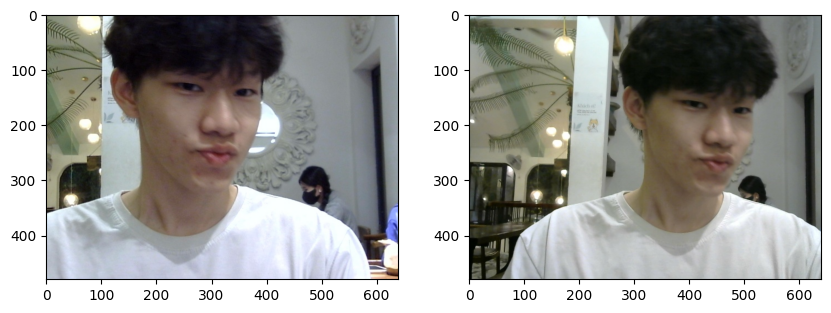

In [9]:
imgL = cv2.imread('frames/left/1.jpg')
imgR = cv2.imread('frames/right/1.jpg')

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(imgL[:,:,::-1])
plt.subplot(1, 2, 2)
plt.imshow(imgR[:,:,::-1])
plt.show()

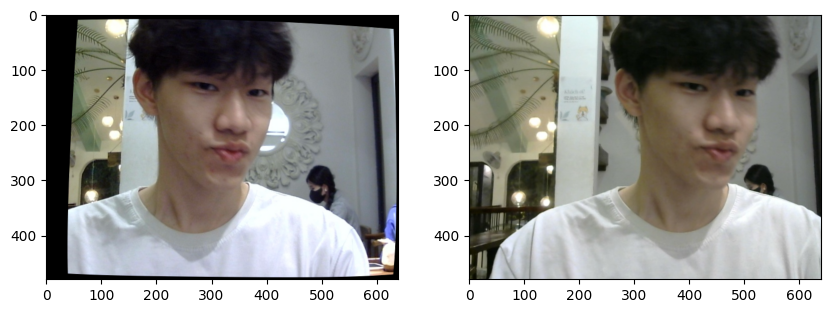

In [10]:
cv_file = cv2.FileStorage("stereoMap.xml", cv2.FILE_STORAGE_READ)
Left_Stereo_Map_x = cv_file.getNode("stereoMapL_x").mat()
Left_Stereo_Map_y = cv_file.getNode("stereoMapL_y").mat()
Right_Stereo_Map_x = cv_file.getNode("stereoMapR_x").mat()
Right_Stereo_Map_y = cv_file.getNode("stereoMapR_y").mat()
cv_file.release()

Left_nice= cv2.remap(imgL, Left_Stereo_Map_x, Left_Stereo_Map_y, cv2.INTER_LINEAR)
Right_nice= cv2.remap(imgR, Right_Stereo_Map_x, Right_Stereo_Map_y, cv2.INTER_LINEAR)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(Left_nice[:,:,::-1])
plt.subplot(1, 2, 2)
plt.imshow(Right_nice[:,:,::-1])
plt.show()

In [ ]:
imgL_gray = cv2.cvtColor(Left_nice,cv2.COLOR_BGR2GRAY)
imgR_gray = cv2.cvtColor(Right_nice,cv2.COLOR_BGR2GRAY)

def nothing(x):
    pass

cv2.namedWindow('disp',cv2.WINDOW_NORMAL)

with open("stereo_config.json", "r") as f:
    configs = json.load(f)

if configs:
    for key, value in configs.items():
        cv2.createTrackbar(key, "disp", value[0], value[1], nothing)
else:
    cv2.createTrackbar('numDisparities','disp',1,17,nothing)
    cv2.createTrackbar('blockSize','disp',5,50,nothing)
    cv2.createTrackbar('preFilterType','disp',1,1,nothing)
    cv2.createTrackbar('preFilterSize','disp',2,25,nothing)
    cv2.createTrackbar('preFilterCap','disp',5,62,nothing)
    cv2.createTrackbar('textureThreshold','disp',10,100,nothing)
    cv2.createTrackbar('uniquenessRatio','disp',15,100,nothing)
    cv2.createTrackbar('speckleRange','disp',0,100,nothing)
    cv2.createTrackbar('speckleWindowSize','disp',0,25,nothing)
    cv2.createTrackbar('disp12MaxDiff','disp',0,25,nothing)
    cv2.createTrackbar('minDisparity','disp',0,25,nothing)

# cap1 = cv2.VideoCapture(0)  # Default webcam
# cap2 = cv2.VideoCapture(1)  # Second webcam

# # Check if cameras opened successfully
# if not cap1.isOpened() or not cap2.isOpened():
#     print("Error: Could not open one or both cameras")
#     exit()

stereo = cv2.StereoBM_create()
while True:
    numDisparities = cv2.getTrackbarPos('numDisparities','disp')*16
    blockSize = cv2.getTrackbarPos('blockSize','disp')*2 + 1
    preFilterType = cv2.getTrackbarPos('preFilterType','disp')
    preFilterSize = cv2.getTrackbarPos('preFilterSize','disp')*2 + 7
    preFilterCap = cv2.getTrackbarPos('preFilterCap','disp') + 1
    textureThreshold = cv2.getTrackbarPos('textureThreshold','disp')
    uniquenessRatio = cv2.getTrackbarPos('uniquenessRatio','disp')
    speckleRange = cv2.getTrackbarPos('speckleRange','disp')
    speckleWindowSize = cv2.getTrackbarPos('speckleWindowSize','disp')*2
    disp12MaxDiff = cv2.getTrackbarPos('disp12MaxDiff','disp')
    minDisparity = cv2.getTrackbarPos('minDisparity','disp')

    stereo.setNumDisparities(numDisparities)
    stereo.setBlockSize(blockSize)
    stereo.setPreFilterType(preFilterType)
    stereo.setPreFilterSize(preFilterSize)
    stereo.setPreFilterCap(preFilterCap)
    stereo.setTextureThreshold(textureThreshold)
    stereo.setUniquenessRatio(uniquenessRatio)
    stereo.setSpeckleRange(speckleRange)
    stereo.setSpeckleWindowSize(speckleWindowSize)
    stereo.setDisp12MaxDiff(disp12MaxDiff)
    stereo.setMinDisparity(minDisparity)

    disparity = stereo.compute(imgR_gray, imgL_gray)
    disparity = disparity.astype(np.float32)
    disparity = disparity / 16.0

    disp_vis = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)
    disp_vis = np.uint8(disp_vis)
    cv2.imshow("disp", disp_vis)

    if cv2.waitKey(1) == 27:
        with open("stereo_config.json", "w") as f:
            json.dump({
                "numDisparities":[cv2.getTrackbarPos('numDisparities','disp'), 17],
                "blockSize":[cv2.getTrackbarPos('blockSize','disp'),50],
                "preFilterType":[cv2.getTrackbarPos('preFilterType','disp'),1],
                "preFilterSize":[cv2.getTrackbarPos('preFilterSize','disp'),25],
                "preFilterCap":[cv2.getTrackbarPos('preFilterCap','disp'),62],
                "textureThreshold":[cv2.getTrackbarPos('textureThreshold','disp'),100],
                "uniquenessRatio":[cv2.getTrackbarPos('uniquenessRatio','disp'),100],
                "speckleRange":[cv2.getTrackbarPos('speckleRange','disp'),100],
                "speckleWindowSize":[cv2.getTrackbarPos('speckleWindowSize','disp'),25],
                "disp12MaxDiff":[cv2.getTrackbarPos('disp12MaxDiff','disp'),25],
                "minDisparity":[cv2.getTrackbarPos('minDisparity','disp'),25],
            }, f)

        cv2.destroyWindow('disp')
        break

plt.imshow(disparity, 'gray')
plt.title('Disparity Map')
plt.colorbar()
plt.show()
# Camera parameters from calibration
focal_length = 720  # in pixels
baseline = 0.075     # in meters

# Compute depth map
depth_map = (focal_length * baseline) / disparity

# Display depth map
plt.imshow(depth_map, cmap='plasma')
plt.colorbar()
plt.title('Depth Map')
plt.show()

AttributeError: module 'cv2' has no attribute 'ximgproc'

In [ ]:
def write_ply(filename, points, colors):
    """Export 3D points and colors to a .ply file"""
    points = points.reshape(-1, 3)
    colors = colors.reshape(-1, 3)
    mask = np.isfinite(points).all(axis=1) & (points[:, 2] > 0)

    with open(filename, 'w') as f:
        f.write(f'''ply
format ascii 1.0
element vertex {len(points)}
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header
''')
        for p, c in zip(points, colors):
            f.write(f'{p[0]} {p[1]} {p[2]} {int(c[2])} {int(c[1])} {int(c[0])}\n')  # BGR -> RGB


In [45]:
points_3D = cv2.reprojectImageTo3D(disparity, Q)
filename = f'output.ply'
write_ply(filename, points_3D, Left_nice)

In [46]:
ms = pml.MeshSet()
ms.load_new_mesh("output.ply")
ms.show_polyscope()